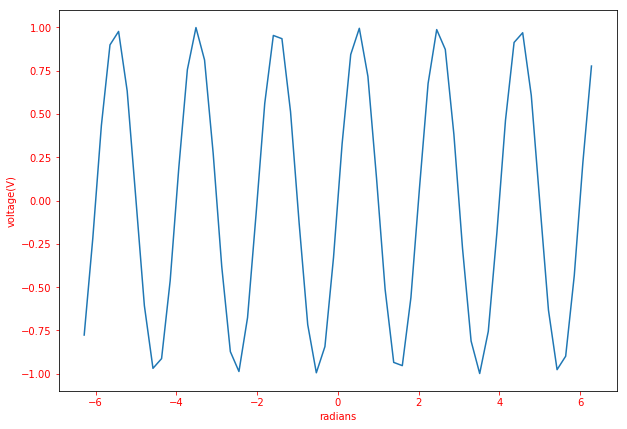

D:\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


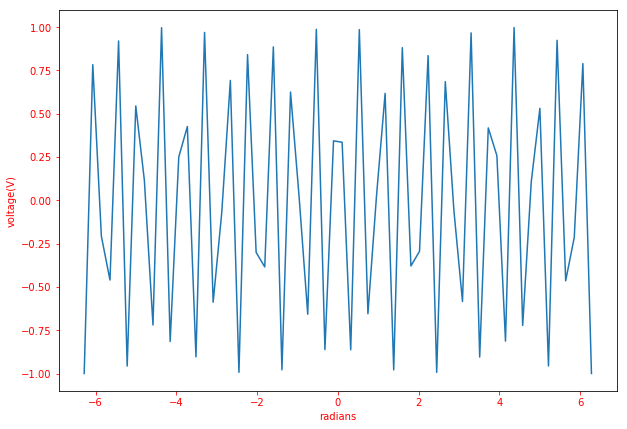

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
#Python signal generator. 


class Signal(object):
    f =1
    a=1
    shift=0
    Fs=60
    h=2
    wtype = 0
    binsize = 16
    def __init__(self,freq,amplitude,shift):
        self.f=freq
        self.a=amplitude
        self.shift= (shift / 180)*np.pi
        
    def fig(self):
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111)
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_color('red')
        ax.tick_params(axis='x', colors='red')
        ax.tick_params(axis='y', colors='red')
        plt.xlabel('radians')
        plt.ylabel('voltage(V)')
        
    def sine(self, Fs):
        self.Fs=Fs
        self.wtype = 0
        self.fig()
        x=np.linspace(-2*np.pi,2*np.pi, Fs) 
        plt.plot(x,self.fsi(x))
        plt.show()
        
    def fsi(self,x):
        value = 0.0
        x = (x - self.shift)
        value = np.sin(2*np.pi*self.f*x / self.Fs)
        return value
    def fsq(self,x):    
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + (np.sin(2 * np.pi * self.f * x * (1/self.Fs)* (2 * h - 1))/(2 * h - 1))
        value *= (self.a*( 4 / np.pi))
        return value
    def fst(self,x):
        value = 0.0
        h= self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + ((-1)**(h+1))*(np.sin(2 * np.pi * self.f * x * (1/self.Fs)* (2 * h - 1))/(((2 * h) - 1)*((2 * h) - 1)))
        value *= self.a*( 8 / ((np.pi)**2))
        return value
    def fss(self,x):
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1,h):
            value = value + (np.sin(2 * np.pi * x * self.f * h * (1 / self.Fs)) / h)*((-1)**h)
        value *= (-2 / np.pi)
        return value
                                                      
    def square(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 1
        x = np.linspace(-2*np.pi,2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fsq(x))   
        plt.show()            
                                                      
    def triangle(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 2
        x = np.linspace(-2*np.pi,2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fst(x))
        plt.show()
        
    def sawtooth(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 3
        x = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        self.fig()
        plt.plot(x, self.fss(x))
        plt.show()
        
    def op(self, wtype, x):
        if (wtype == 0):
            return self.fsi(x)
        elif (wtype == 1):
            return self.fsq(x)
        elif (wtype == 2):
            return self.fst(x)
        elif (wtype == 3):
            return self.fss(x)
    
    def multiply(self, sig):
        self.fig()
        x1 = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        x2 = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        plt.plot(x1, self.op(self.wtype, x1) * sig.op(sig.wtype,x2))
    
    def add(self,sig):
        self.fig()
        x= np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        plt.plot(x, self.op(self.wtype,x) + sig.op(sig.wtype,x))
    
    def subtract(self, sig):
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, self.Fs)
        plt.plot(x, self.op(self.wtype,x) - sig.op(sig.wtype,x))

class Modulation(Signal):
    m = 1
    fshift = np.array([])
    def __init__(self, centerFreq, amplitude, m):
        self.f = centerFreq
        self.a = amplitude
        self.wtype = 0
        self.m = m
    def modindex(self,modindex):
        self.m = modindex
    def AM(self, sig):
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        if (self.wtype == 0):
            plt.plot(x, (1/2)*((self.m*sig.op(sig.wtype,x))+1)*np.cos(2*np.pi*x*self.f)*self.a)
        else:
            plt.plot(x, (1/2)*(sig.op(sig.wtype,x)+1)*(self.op(self.wtype,x)))
        plt.show()
    def FM(self,sig):
        tao = 0
        self.fig()
        x = np.linspace(-2*np.pi, 2*np.pi, sig.Fs)
        fshift = np.zeros(x.size)
        if(self.wtype == 0):
            fshift = self.fmi(x)
            plt.plot(x, sig.a*np.cos(2*np.pi*sig.f*x + (self.m)*(self.a)*fshift))
        else:
            fshift = self.fmi(x)
        plt.show()
        
            #sig.shift = self.op(sig.wtype,x) * self.m
            #plt.plot(x, sig.a * sig.op(sig.wtype,x))
        
    def fmi (self, x):
        value = np.zeros(x.size)
        for index in range(0, x.size):
            upperlimit = x[index]
            value[index], err = integrate.quad(lambda tao: np.sin(2*np.pi*self.f*tao), - 2*np.pi, upperlimit)
        return value
        
####FFT Methods Below
def BitReversal(value, binsize):
    val2 = 0
    count = (binsize/4)
    for x in range(0, int(count)):
        if (value & 1 == 1):
            val2 <<= 1
            val2 = val2 + 1
        elif(value & 1 == 0):
            val2 <<= 1
        value >>= 1
    return val2
def Reindex(a, binsize):
    output = np.zeros(a.size)
    index = 0 
    for index in range(0, a.size):
        y = BitReversal(index, binsize)
        output[index] = a[y]
    return output
def DFT(tsig):
    k=0
    out = np.zeros(tsig.size, dtype=np.complex_)
    for k in range(0, out.size-1, 1):
        for n in range(0, tsig.size -1, 1):
            out[k] += tsig[n] * np.exp((-1j*2*np.pi*k*n)/tsig.size)
        out[k] *= (1/tsig.size)
    return out
#say N= 16
def fs(a, binsize):
    N1 = int((binsize/4)) #So three twiddle coefficients, one for binsize, N1 and N2.
    N2 = int((binsize/N1))
    n1 = int(N1-1) #0<=n1<=N1-1
    n2 = int(N2-1) #0<=n2<=N2-1
    k1 = 0 #0<=k1<=N1-1
    k2 = 0 #0<=k2<=N2-1
    n = N2*n1 + n2
    k = k1 + N1*k2
    a2 = np.zeros(shape=(N1,N2),dtype=np.complex_)
    G = np.zeros(shape=(N1,N2),dtype=np.complex_)
    Gk = np.zeros(shape=(N1,N2),dtype=np.complex_)
    for n1 in range(0, N1):
        for k1 in range(0, N1): #N1=2
            for n2 in range(0, N2): #N2=4
                G[k1, n2] += a[N2*n1+n2] * (twiddle(n1,N1)**k1)
                G[k1, n2] *=twiddle(n2,binsize)**k1 #squiggle!
          
    print(G)
    return G
#n = N2*n1 + n2                
def twiddle(n,binsize):
    W = np.exp((-1j*2*np.pi*n)/ binsize)
    return W

#binsize = x point DFT
binsize = 16
a = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])



sig = Signal(30,1,0)
sig.sine(60)
mod = Modulation(15,1,.5)
mod.FM(sig)

    

    
    



        